In [4]:
import numpy as np  
  
  
# Function: K Means  
# -------------  
# K-Means is an algorithm that takes in a dataset and a constant  
# k and returns k centroids (which define clusters of data in the  
# dataset which are similar to one another).  
  
# 定义kmeans方法 （数据集，划分为k类，停止的条件）  
def kmeans(X, k, maxIt):  
      
    numPoints, numDim = X.shape # 获取多少行（实例数） 多少列（维度）  
      
    dataSet = np.zeros((numPoints, numDim + 1))  
    dataSet[:, :-1] = X  
      
    # Initialize centroids randomly 随机的初始化中心点  
    centroids = dataSet[np.random.randint(numPoints, size = k), :]  
    #random.randint(a,b)用于生成一个指定范围内的整数。其中参数a是下限，参数b是上限，此处指定了max和size  
    #Randomly assign labels to initial centorid 分配标签  
    centroids[:, -1] = range(1, k +1) #最后一列为label 
      
    # Initialize book keeping vars.  
    iterations = 0  
    oldCentroids = None  
      
    # Run the main k-means algorithm  
    while not shouldStop(oldCentroids, centroids, iterations, maxIt):  
        print ("iteration: \n"), iterations # 迭代次数  
        print ("dataSet: \n"), dataSet  
        print ("centroids: \n"), centroids  
        # Save old centroids for convergence test. Book keeping.  
        oldCentroids = np.copy(centroids)  
        iterations += 1  
          
        # Assign labels to each datapoint based on centroids 更新归类  
        updateLabels(dataSet, centroids)  
          
        # Assign centroids based on datapoint labels 更新中心点  
        centroids = getCentroids(dataSet, k)  
          
    # We can get the labels too by calling getLabels(dataSet, centroids)  
    return dataSet  
  
  
# Function: Should Stop  
# -------------  
# Returns True or False if k-means is done. K-means terminates either  
# because it has run a maximum number of iterations OR the centroids  
# stop changing.  
def shouldStop(oldCentroids, centroids, iterations, maxIt):  
    if iterations > maxIt:  
        return True  
    return np.array_equal(oldCentroids, centroids)    
  
  
# Function: Get Labels  
# -------------  
# Update a label for each piece of data in the dataset.   
def updateLabels(dataSet, centroids):  
    # For each element in the dataset, chose the closest centroid.   
    # Make that centroid the element's label.  
    numPoints, numDim = dataSet.shape  
    for i in range(0, numPoints):  
        dataSet[i, -1] = getLabelFromClosestCentroid(dataSet[i, :-1], centroids)  
      
# （数据集中的一行，中心点）    
def getLabelFromClosestCentroid(dataSetRow, centroids):  
    label = centroids[0, -1];  
    minDist = np.linalg.norm(dataSetRow - centroids[0, :-1])  
    for i in range(1 , centroids.shape[0]):  
        dist = np.linalg.norm(dataSetRow - centroids[i, :-1])  
        if dist < minDist:  
            minDist = dist  
            label = centroids[i, -1]  
    print ("minDist:"), minDist  
    return label  
      
          
      
# Function: Get Centroids  
# -------------  
# Returns k random centroids, each of dimension n.  
def getCentroids(dataSet, k):  
    # Each centroid is the geometric mean of the points that  
    # have that centroid's label. Important: If a centroid is empty (no points have  
    # that centroid's label) you should randomly re-initialize it.  
    result = np.zeros((k, dataSet.shape[1]))  
    for i in range(1, k + 1):  
        oneCluster = dataSet[dataSet[:, -1] == i, :-1]  
        result[i - 1, :-1] = np.mean(oneCluster, axis = 0)  
        result[i - 1, -1] = i  
      
    return result  
      
      
x1 = np.array([1, 1])  
x2 = np.array([2, 1])  
x3 = np.array([4, 3])  
x4 = np.array([5, 4])  
testX = np.vstack((x1, x2, x3, x4)) # 组成矩阵  
  
  
result = kmeans(testX, 2, 10)  
print ("final result:") 
print (result)

iteration: 

dataSet: 

centroids: 

minDist:
minDist:
minDist:
minDist:
iteration: 

dataSet: 

centroids: 

minDist:
minDist:
minDist:
minDist:
final result:
[[ 1.  1.  1.]
 [ 2.  1.  1.]
 [ 4.  3.  2.]
 [ 5.  4.  2.]]


lable_pred: [1 0 2 2 1 1 2 2 0 2 2 2 2 1 0 0 0 1 2 0 2 2 2 0 0 2 1 0 1 2 0 2 0 2 0 2 2
 2 2 1 1 1 1 0 0 1 1 0 2 1 1 2 0 1 2 0 2 1 0 1 1 0 2 1 0 0 2 1 2 1 1 1 1 0
 1 0 2 2 0 2 0 1 2 0 1 2 2 1 1 1 2 0 2 2 0 2 2 2 1 1]
centroids: [[ 0.18892532  0.36867795]
 [ 0.67276078  0.25905523]
 [ 0.5295614   0.79727542]]
inertia: 6.08770597945


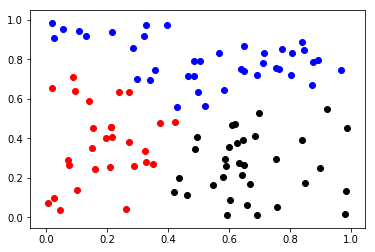

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


"'' \nKMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300, \n    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto', \n    random_state=None, tol=0.0001, verbose=0) \n"

In [1]:
# -*- coding: utf-8 -*-  
""" 
@author: tz_zs 
sklearn.cluster.KMeans的使用2 
"""  
  
from sklearn.cluster import KMeans  
from sklearn.externals import joblib  
import numpy as np  
import matplotlib.pyplot as plt  
  
data = np.random.rand(100, 2)  
estimator = KMeans(n_clusters=3)  
res = estimator.fit_predict(data)  
lable_pred = estimator.labels_  
centroids = estimator.cluster_centers_  
inertia = estimator.inertia_  
  
print("lable_pred:", lable_pred)  
print("centroids:", centroids)  
print("inertia:", inertia)  
  
for i in range(len(data)):  
    if int(lable_pred[i]) == 0:  
        plt.scatter(data[i][0], data[i][1], color='red')  
    if int(lable_pred[i]) == 1:  
        plt.scatter(data[i][0], data[i][1], color='black')  
    if int(lable_pred[i]) == 2:  
        plt.scatter(data[i][0], data[i][1], color='blue')  
  
plt.show()  
  
#  保存机器学习算法模型  
joblib.dump(value=estimator, filename="./km_model.m")  
load = joblib.load("./km_model.m")  
print(load)  